In [2]:
import pandas as pd
from ipynb.fs.full.utils import custom_groupby, get_df, replace_values_by_condition
from ipynb.fs.full.plots import heatmap

In [3]:
# get formatted and ready to use dataframe
df = get_df()

In [4]:
df.head(10)

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q4_ML_Life_Cycle_Main_Problems_Model_Monitoring_Free_Third,Q4_ML_Life_Cycle_Main_Problems_Model_Other_Free_First,Q4_ML_Life_Cycle_Main_Problems_Model_Other_Free_Second,Q4_ML_Life_Cycle_Main_Problems_Model_Other_Free_Third,Q5_ML_Life_Cycle_Main_Problems_Ranking_Free_First,Q5_ML_Life_Cycle_Main_Problems_Ranking_Free_Second,Q5_ML_Life_Cycle_Main_Problems_Ranking_Free_Third,Q6_ML_Solution_Optimality,Q7_ML_Solution_Optimality_Extra_Effort,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,Feeding the model in appropriate way,-99,-99,-99,Problems with data collection and cleaning,Others tasks which competes the time,Search the appropriate methodology,Frequently,70,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,-99,-99,-99,-99,-99,-99,-99,Never,-77,-99
4,36,Completed (31),1593,Mathmathics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,-99,-99,-99,-99,Data preparation,Prediction Task identification,Selecionar of learning algo,Sometimes,30,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,-99,-99,-99,-99,-99,-99,-99,Sometimes,50,-99
6,46,Completed (31),2821,Graduation in Actuary,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,-99,-99,-99,-99,understand the pain and identify if ML is real...,we need to cut or we need to cluster some kind...,present and discuss metrics and distribution o...,Sometimes,20,-99
7,53,Completed (31),2097,Information System,-99,M.Sc. in Applied Informatics,-99,-99,-99,Brazil,...,-99,-99,-99,-99,insufficient amount of data,apply the models,Not knowing how to deploy,Sometimes,50,-99
8,58,Completed (31),1696,Computer Science,-99,Computer Science,-99,Microsoft Professional Program Data Science & ...,-99,Germany,...,-99,-99,-99,-99,Data Availability,Sufficient Data Quantity,Deployment Costs for non-trivial ML projects,Sometimes,30,https://t.co/
9,64,Completed (31),1250,Electrical engineering,-99,M.Sc. in AI and Software Engineering,Computer science,"Azure Associate AI Engineer, Azure Data Scienc...",-99,Sweden,...,-99,-99,-99,-99,"Basic: no proper engagement from management, n...",Understand the context,-99,Sometimes,50,https://www.linkedin.com/
10,65,Completed (31),106,-99,-99,-99,-99,-99,-99,0,...,-99,-99,-99,-99,-99,-99,-99,Never,-77,-99
11,69,Completed (31),79,-99,-99,-99,-99,-99,-99,0,...,-99,-99,-99,-99,-99,-99,-99,Never,-77,https://ww2.unipark.de/uc/seml/


In [6]:
df[['Q2_ML_Life_Cycle_Difficulty_Problem_Understanding', 'Q2_ML_Life_Cycle_Difficulty_Data_Collection', 
'Q2_ML_Life_Cycle_Difficulty_Data_Pre-Processing', 'Q2_ML_Life_Cycle_Difficulty_Model_Creation',
'Q2_ML_Life_Cycle_Difficulty_Model_Evaluation', 'Q2_ML_Life_Cycle_Difficulty_Model_Deployment',
'Q2_ML_Life_Cycle_Difficulty_Model_Monitoring']].head()

,Q2_ML_Life_Cycle_Difficulty_Problem_Understanding,Q2_ML_Life_Cycle_Difficulty_Data_Collection,Q2_ML_Life_Cycle_Difficulty_Data_Pre-Processing,Q2_ML_Life_Cycle_Difficulty_Model_Creation,Q2_ML_Life_Cycle_Difficulty_Model_Evaluation,Q2_ML_Life_Cycle_Difficulty_Model_Deployment,Q2_ML_Life_Cycle_Difficulty_Model_Monitoring
2,0,0,0,0,0,0,0
3,Complex,Complex,Very Complex,Very Complex,Complex,Very Complex,Neutral
4,Complex,Very Complex,Complex,Complex,Neutral,Neutral,Complex
5,Complex,Easy,Easy,Neutral,Complex,Very Complex,Easy
6,Neutral,Neutral,Complex,Complex,Very Complex,Very Complex,Neutral


In [8]:
# check if there is something unexpected in the columns
# print(df['Q2_ML_Life_Cycle_Difficulty_Problem_Understanding'].unique())
# print(df['Q2_ML_Life_Cycle_Difficulty_Data_Collection'].unique())
# print(df['Q2_ML_Life_Cycle_Difficulty_Data_Pre-Processing'].unique())
# print(df['Q2_ML_Life_Cycle_Difficulty_Model_Creation'].unique())
# print(df['Q2_ML_Life_Cycle_Difficulty_Model_Evaluation'].unique())
# print(df['Q2_ML_Life_Cycle_Difficulty_Model_Deployment'].unique())
# print(df['Q2_ML_Life_Cycle_Difficulty_Model_Monitoring'].unique())

In [9]:
# two unexpected values appear = 0 and -77
# replace them to "I don't know" value

# replacing 0
df = replace_values_by_condition(df, 'Q2_ML_Life_Cycle_Difficulty_Problem_Understanding', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q2_ML_Life_Cycle_Difficulty_Data_Collection', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q2_ML_Life_Cycle_Difficulty_Data_Pre-Processing', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q2_ML_Life_Cycle_Difficulty_Model_Creation', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q2_ML_Life_Cycle_Difficulty_Model_Evaluation', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q2_ML_Life_Cycle_Difficulty_Model_Deployment', "0", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q2_ML_Life_Cycle_Difficulty_Model_Monitoring', "0", "I don't know", "eq")

# replacing -77
df = replace_values_by_condition(df, 'Q2_ML_Life_Cycle_Difficulty_Problem_Understanding', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q2_ML_Life_Cycle_Difficulty_Data_Collection', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q2_ML_Life_Cycle_Difficulty_Data_Pre-Processing', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q2_ML_Life_Cycle_Difficulty_Model_Creation', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q2_ML_Life_Cycle_Difficulty_Model_Evaluation', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q2_ML_Life_Cycle_Difficulty_Model_Deployment', "-77", "I don't know", "eq")
df = replace_values_by_condition(df, 'Q2_ML_Life_Cycle_Difficulty_Model_Monitoring', "-77", "I don't know", "eq")

In [10]:
columns = {
    'Q2_ML_Life_Cycle_Difficulty_Problem_Understanding': 'Problem Understanding',
    'Q2_ML_Life_Cycle_Difficulty_Data_Collection': 'Data Collection',
    'Q2_ML_Life_Cycle_Difficulty_Data_Pre-Processing': 'Data Pre-Processing',
    'Q2_ML_Life_Cycle_Difficulty_Model_Creation': 'Model Creation',
    'Q2_ML_Life_Cycle_Difficulty_Model_Evaluation': 'Model Evaluation',
    'Q2_ML_Life_Cycle_Difficulty_Model_Deployment': 'Model Deployment',
    'Q2_ML_Life_Cycle_Difficulty_Model_Monitoring': 'Model Monitoring'
}

values = ["Very Easy", "Easy", "Neutral", "Complex", "Very Complex", "I don't know"]


# it will store the life cycles
life_cycles = []
# it will store the difficulties
difficulties = []
# it will store the total answers of those who answered 'Problem Understanding' and 
# said that is 'Not Relevant at All', 'Low Relevance'... then, 'Data Collection' with 'Not Relevant at All', 'Low Relevance'...
answers = []

# let's compute for each life cycle and difficulty, the total answers
for column in columns:
    for value in values:
        
        life_cycles.append(columns[column])
        difficulties.append(value)
        answers.append(df[column].value_counts().get(value, 0))

In [11]:
# create a custom dataframe to handle only the columns that we want
q2_df = pd.DataFrame()
q2_df['Life Cycle'] = life_cycles
q2_df['Difficulty'] = difficulties
q2_df['Answers'] = answers

In [12]:
q2_df

,Life Cycle,Difficulty,Answers
0,Problem Understanding,Very Easy,1
1,Problem Understanding,Easy,8
2,Problem Understanding,Neutral,42
3,Problem Understanding,Complex,81
4,Problem Understanding,Very Complex,51
5,Problem Understanding,I don't know,93
6,Data Collection,Very Easy,0
7,Data Collection,Easy,19
8,Data Collection,Neutral,63
9,Data Collection,Complex,60


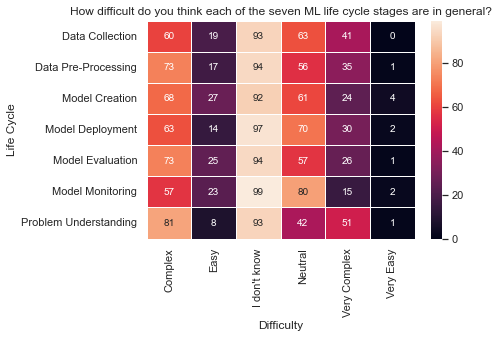

In [13]:
heatmap(q2_df, 'Life Cycle', 'Difficulty', 'Answers', title='How difficult do you think each of the seven ML life cycle stages are in general?')